In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import plotly.express as px

In [4]:
import seaborn as sns
penguins = sns.load_dataset('penguins')

In [24]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


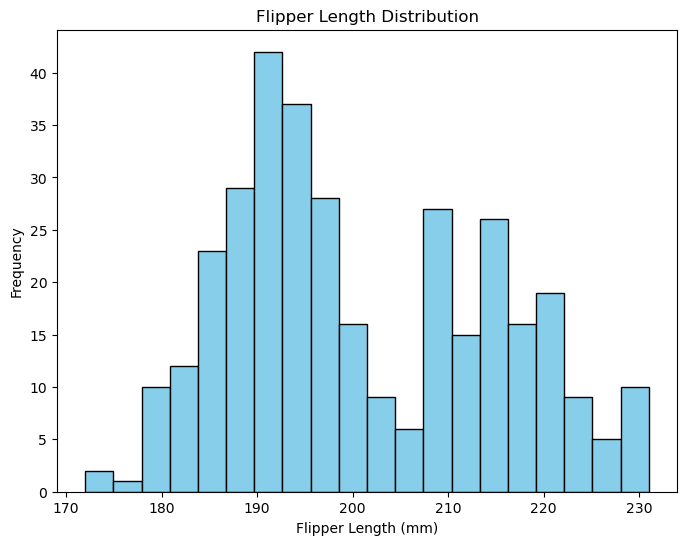

In [16]:
## Histogram

# Histogram of flipper length
plt.figure(figsize=(8, 6))
plt.hist(penguins['flipper_length_mm'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Flipper Length Distribution')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.savefig('flipper_length_hist.png')
#plt.show()


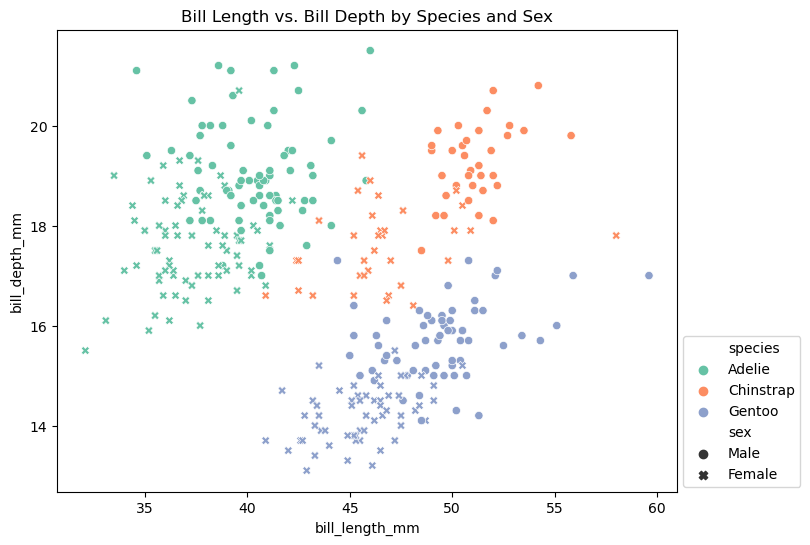

In [5]:
# Scatter plot of bill length vs. bill depth
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex',
                palette='Set2')
plt.title('Bill Length vs. Bill Depth by Species and Sex')
plt.legend(loc=(1.01,.01))
plt.savefig('bill_length_vs_bill_depth.png')
#plt.show()


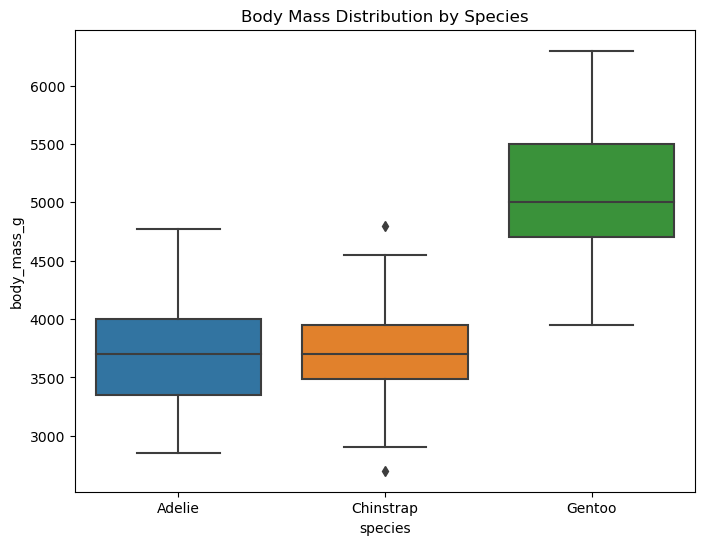

In [18]:
# Box plot of body mass by species
plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x='species', y='body_mass_g')
plt.title('Body Mass Distribution by Species')
plt.savefig('body_mass_boxplot.png')
#plt.show()


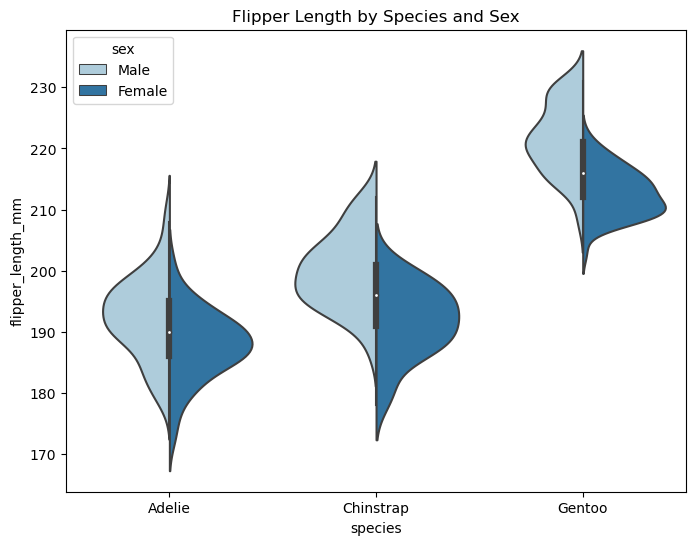

In [58]:
# Violin plot of flipper length by species, split by sex
plt.figure(figsize=(8, 6))
sns.violinplot(data=penguins, x='species', y='flipper_length_mm', hue='sex', split=True, palette='Paired')
plt.title('Flipper Length by Species and Sex')
plt.savefig('flipper_length_violin.png')
#plt.show()


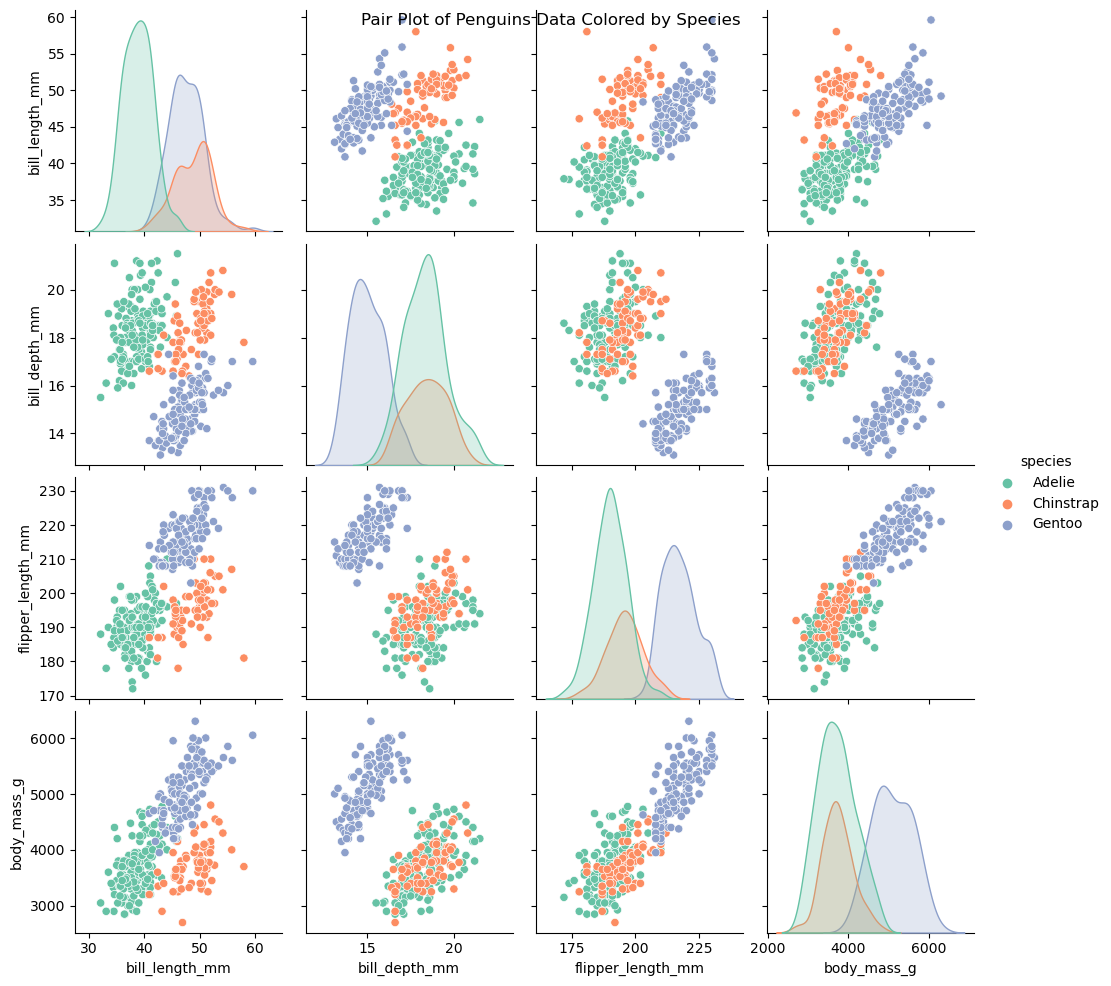

In [54]:
# Pair plot of the dataset colored by species
sns.pairplot(penguins.dropna(), hue='species', palette='Set2')
plt.suptitle('Pair Plot of Penguins Data Colored by Species', verticalalignment='top')
plt.savefig('pairplot.png')
#plt.show()


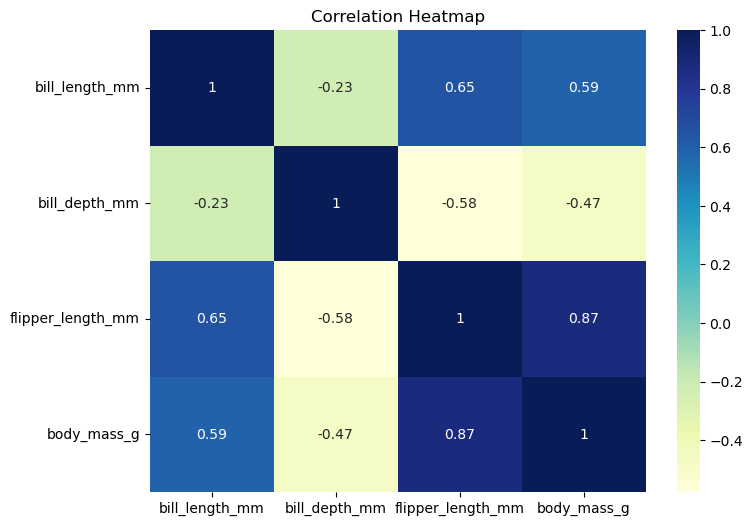

In [23]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
corr = penguins.dropna().corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
#plt.show()


<Figure size 800x600 with 0 Axes>

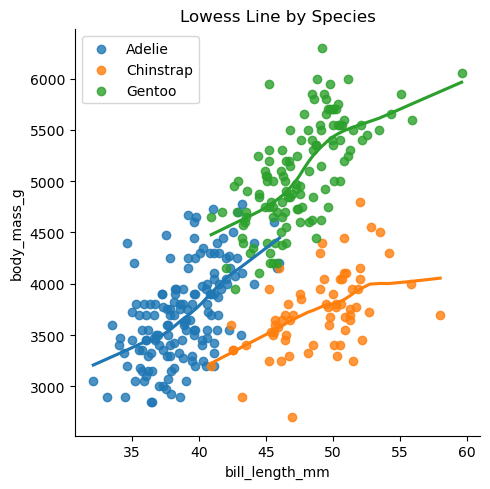

In [59]:
plt.figure(figsize=(8,6))
sns.lmplot(data=penguins, x='bill_length_mm', y='body_mass_g',hue='species', lowess=True, legend=False)
plt.title('Lowess Line by Species')
plt.tight_layout()
plt.legend(loc='upper left')
plt.savefig('lowess_line_by_species.png');
#plt.show()
#sns.lmplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species',lowess=True)

In [14]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


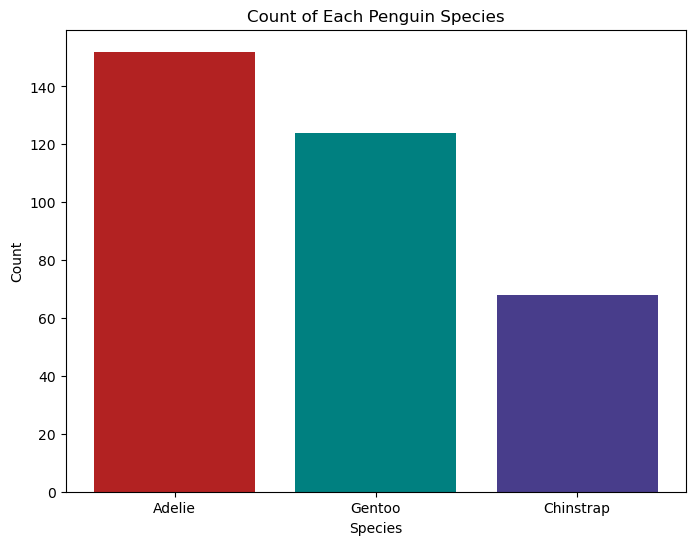

In [66]:
# Count the occurrences of each species
species_counts = penguins['species'].value_counts()

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(species_counts.index, species_counts.values, color=['firebrick', 'teal', 'darkslateblue'])

# Add labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Each Penguin Species')
plt.savefig('count_of_each_penguin_species.png')
# Show the plot
#plt.show()


In [83]:
fig = px.scatter(penguins, x='bill_length_mm', y='bill_depth_mm', color='species', symbol='sex',
                 color_discrete_sequence=px.colors.qualitative.Set2,
                 symbol_sequence=['circle', 'x'],)
fig.update_layout(width=1000, height=800)
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
#fig.show()
fig.write_html('plotly_scatter.html')

<Figure size 1000x1000 with 0 Axes>

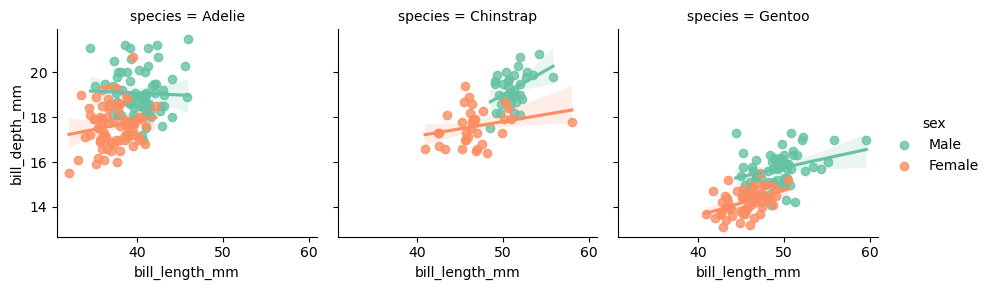

In [13]:
plt.figure(figsize=(10, 10))
g = sns.FacetGrid(penguins, col="species",hue='sex', palette='Set2')
# Notice hwo the arguments come after plt.scatter call
g = g.map(sns.regplot, "bill_length_mm", "bill_depth_mm").add_legend()
plt.savefig('facet_grid.png')